In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(42)

## Portfolio Planner
#### We will use the Alpaca api to grab historical data for a portfolio chosen by the user

In [3]:
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# api = tradeapi.REST()
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

# Entering Stocks
### we will let the user to enter their preferred stocks

In [4]:
text = input('Enter Stocks separated by comma, up to five stocks only')
text = text.split(',')

Enter Stocks separated by comma, up to five stocks only spy


In [8]:
weights = input('Enter weights: ')
weights = list(map(float,weights.split(',')))
print(weights)

Enter weights:  0.2,0.2,0.2,0.2,0.2


[0.2, 0.2, 0.2, 0.2, 0.2]


In [6]:
start_date = input('Enter Start Date: e.g. 2019-01-01: ')
print(f'your start date is: {start_date}')

Enter Start Date: e.g. 2019-01-01:  2018-01-01


your start date is: 2018-01-01


In [7]:
end_date = input('Enter End Date: e.g. 2019-01-01')
print(f'your end date is: {end_date}')

Enter End Date: e.g. 2019-01-01 2019-01-01


your end date is: 2019-01-01


In [9]:
number_simulations = int(input('Enter number of simulations: '))
print(f'number of simulations is {number_simulations}')

Enter number of simulations:  20


number of simulations is 20


In [10]:
number_records = int(input('Enter number of years:'))

Enter number of years: 20


In [6]:
list_of_tickers = text.split(',')
# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
#end_date = datetime.now()
#start_date = end_date + timedelta(-365*100)

start_date = pd.Timestamp(start_date, tz='America/New_York').isoformat()
end_date = pd.Timestamp(end_date, tz='America/New_York').isoformat()
df = api.get_barset(
    list_of_tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df
df = df.sort_index()
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df = df.droplevel(axis=1, level=1)
df.index = df.index.date
df.dropna(inplace=True)
df.tail()

NameError: name 'test' is not defined

In [1]:
df.count()

NameError: name 'df' is not defined

# Monte Carlo Simulation

Here, we  will run Monte Carlo Simulations for the portfolio to model portfolio performance.

We will do the following steps:
1. Calculate the daily returns for the given stocks closing prices.
2. Calculate volatility for the given stocks closing prices.
3. Find the last day's closing price for the stocks and save those as variables.
4. Run a Monte Carlo Simulation 


In [18]:
means = {}
daily_returns = df.pct_change()
daily_returns.dropna(inplace=True)

for stock in list_of_tickers:
    print(stock)
    means[stock] = daily_returns.mean()[stock]
    print(f'{stock} mean: {means[stock]}')

AAPL
AAPL mean: -0.00021250953939727112
AMZN
AMZN mean: 0.0011707734649056127
GOOG
GOOG mean: 2.176086064539051e-05
MSFT
MSFT mean: 0.0007977924615533376
NFLX
NFLX mean: 0.0015461355884193216


In [8]:
std = {}
for stock in list_of_tickers:
    print(stock)
    std[stock] = daily_returns.std()[stock]
    print(f'{stock} std: {std[stock]}')

NameError: name 'list_of_tickers' is not defined

In [7]:
last_day = {}
for stock in list_of_tickers:
    print(stock)
    last_day[stock] = df[stock][-1]
    print(f'{stock} last days closing price: {last_day[stock]}')

NameError: name 'list_of_tickers' is not defined

In [15]:
#number_simulations = int(input('Enter number of simulations: '))
#print(f'number of simulations is {number_simulations}')

In [16]:
#number_records = int(input('Enter number of years:'))


In [21]:
# Setup the Monte Carlo Parameters
#number_simulations = 500
number_records = (number_records * 252) 
monte_carlo = pd.DataFrame()
number_records

5040

In [22]:
simulated_prices = {stock:[last_day[stock]] for stock in list_of_tickers}
simulated_prices

{'AAPL': [156.7],
 'AMZN': [1492.38],
 'GOOG': [1029.11],
 'MSFT': [100.83],
 'NFLX': [266.3142]}

In [9]:
for x in range(number_simulations):
    # YOUR CODE HERE
    
    # Initialize the simulated prices list with the last closing price of AGG and SPY
    simulated_prices = {stock:[last_day[stock]] for stock in list_of_tickers}
    #simulated_spy_prices = [spy_last_day]
    
    for i in range(number_records):
        for stock in list_of_tickers:
            simulated_price = simulated_prices[stock][-1] * (1 + np.random.normal(means[stock], std[stock]))

            simulated_prices[stock].append(simulated_price)
        #simulated_spy_prices.append(simulated_price_spy)
    
    #weighted = weights.split(',')
    simulated_prices_df = pd.DataFrame(simulated_prices)
    #simulated_prices_df = pd.Series(simulated_prices)
    #simulated_prices['SPY'] = pd.Series(simulated_spy_prices)
    
    simulated_dr = simulated_prices_df.pct_change()
    simulated_dr.dropna(inplace=True)

    portfolio_daily_returns = simulated_dr.dot(weights)
    
    
    monte_carlo[x] = (1+portfolio_daily_returns.fillna(0)).cumprod()

NameError: name 'number_simulations' is not defined

In [24]:
simulated_prices_df

,AAPL,AMZN,GOOG,MSFT,NFLX
0,156.700000,1492.380000,1029.110000,100.830000,266.314200
1,155.139151,1500.701357,1001.817727,99.912694,271.751977
2,153.859908,1564.457209,992.809044,100.743098,270.564107
3,153.131885,1589.702259,1025.351246,100.641342,283.808095
4,151.020867,1577.147420,1019.832678,103.631351,264.797528
...,...,...,...,...,...
5036,3.700242,204306.243975,415.993004,5827.220609,60649.171539
5037,3.823852,207886.804440,422.499280,5830.406312,61832.444881
5038,3.817574,212764.374052,438.660412,5786.866263,63320.818380
5039,3.964454,209575.610146,440.799196,5604.052052,63785.031821


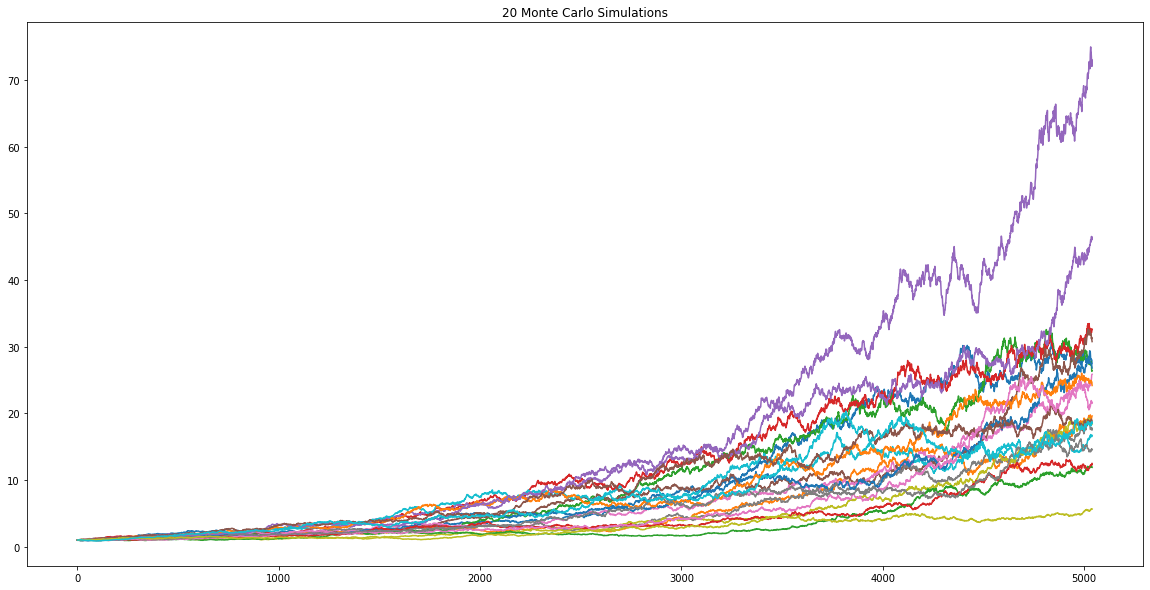

In [25]:
monte_carlo.plot(legend=None, title=f'{number_simulations} Monte Carlo Simulations', figsize=(20,10))

In [26]:
cumulative_return_last = monte_carlo.iloc[-1]
cumulative_return_last

0     27.438217
1     19.612228
2     26.375709
3     32.604877
4     46.406054
5     30.768245
6     25.867800
7     17.538139
8     18.414620
9     16.698941
10    26.811302
11    24.182569
12    11.908332
13    12.484965
14    72.991963
15    18.840689
16    21.577414
17    14.527513
18     5.667208
19    18.534616
Name: 5040, dtype: float64

In [27]:
confidence_interval = cumulative_return_last.quantile([0.05,0.95])
confidence_interval

0.05    11.596276
0.95    47.735350
Name: 5040, dtype: float64

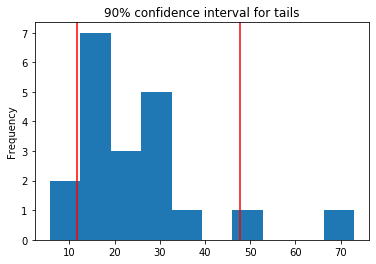

In [28]:
plt.figure()
cumulative_return_last.plot.hist(title="90% confidence interval for tails")
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [29]:
daily_std = simulated_prices_df.std()
daily_std

AAPL        33.231934
AMZN     38761.442124
GOOG       616.990524
MSFT      1244.735330
NFLX    118259.624791
dtype: float64

In [30]:
daily_std.sort_values(ascending = False)


NFLX    118259.624791
AMZN     38761.442124
MSFT      1244.735330
GOOG       616.990524
AAPL        33.231934
dtype: float64

In [31]:
#annualized standard deviation
annualized_std = daily_std * np.sqrt(252)
annualized_std

AAPL    5.275406e+02
AMZN    6.153188e+05
GOOG    9.794421e+03
MSFT    1.975956e+04
NFLX    1.877313e+06
dtype: float64

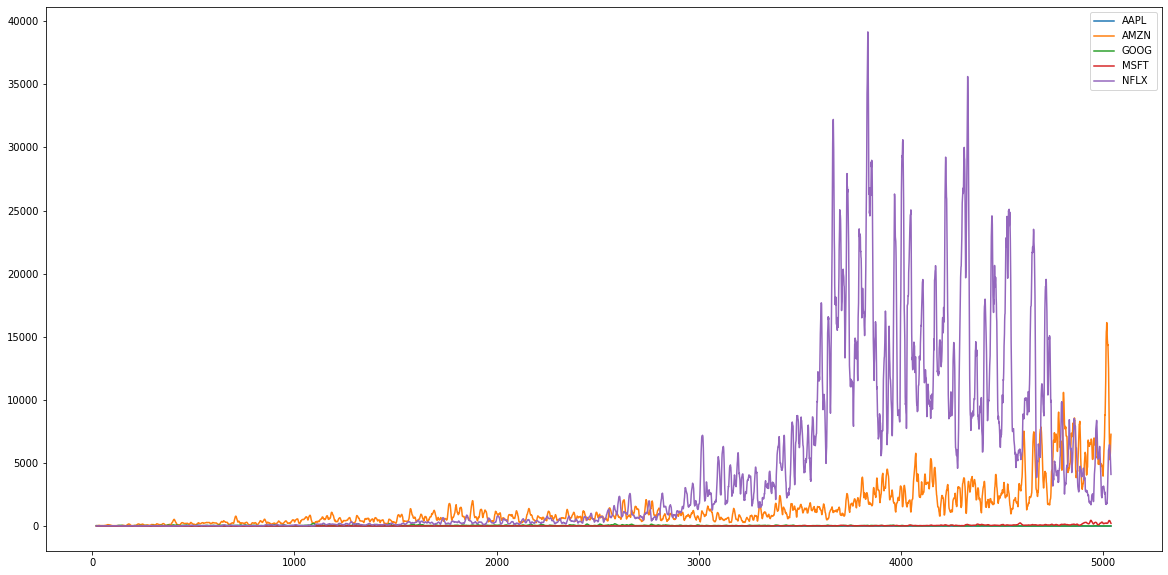

In [32]:
simulated_prices_df.rolling(window=21).std().plot(figsize=(20,10))

In [33]:
correlation = simulated_prices_df.corr()
correlation

,AAPL,AMZN,GOOG,MSFT,NFLX
AAPL,1.000000,-0.559446,0.160614,-0.492648,-0.528864
AMZN,-0.559446,1.000000,-0.679895,0.949430,0.506179
GOOG,0.160614,-0.679895,1.000000,-0.716420,-0.534387
MSFT,-0.492648,0.949430,-0.716420,1.000000,0.466667
NFLX,-0.528864,0.506179,-0.534387,0.466667,1.000000


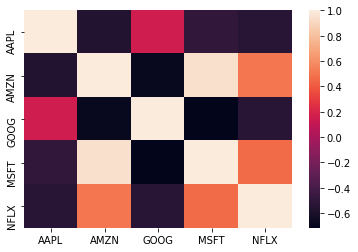

In [34]:
sns.heatmap(correlation)


In [35]:
# Sharpe Ratios
sharpe_ratios = (simulated_prices_df.mean() * 252) / (simulated_prices_df.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending = False)

GOOG    39.005127
AAPL    15.825594
AMZN    14.439985
MSFT    11.665241
NFLX    11.541671
dtype: float64

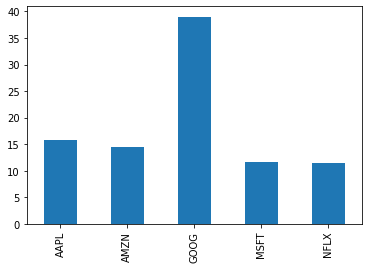

In [36]:
sharpe_ratios.plot.bar()